# Analyse planetary nebual
- author : Sylvie Dagoret-Campagne
- affiliation : IJCLab/IN2P3/CNES, DESC-LSST fullmember, behalf AuxTel Teal VERA C. Rubin observatory
- creation date : 16 September2021
- **kernel : anaconda3_auxtel**
- update : July 22th 2021
- update : September 16th 2021 



# Selection Flag

In [1]:
from astropy.io import fits
import sys, platform, os
#from astropy.visualization import simple_norm
#from astropy.visualization import imshow_norm, MinMaxInterval, SqrtStretch
import astropy.visualization  as aspv
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from matplotlib.colors import LogNorm

In [2]:
from astroquery.simbad import Simbad
from astropy.coordinates import SkyCoord

In [3]:
plt.rcParams["axes.labelsize"]="large"
plt.rcParams["axes.linewidth"]=2.0
plt.rcParams["xtick.major.size"]=8
plt.rcParams["ytick.major.size"]=8
plt.rcParams["ytick.minor.size"]=5
plt.rcParams["xtick.labelsize"]="large"
plt.rcParams["ytick.labelsize"]="large"

plt.rcParams["figure.figsize"]=(12,12)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
#plt.rcParams['axes.facecolor'] = 'blue'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['lines.markeredgewidth'] = 0.3 # the line width around the marker symbol
plt.rcParams['lines.markersize'] = 5  # markersize, in points
plt.rcParams['grid.alpha'] = 0.75 # transparency, between 0.0 and 1.0
plt.rcParams['grid.linestyle'] = '-' # simple line
plt.rcParams['grid.linewidth'] = 0.4 # in points
plt.rcParams['font.size'] = 13

# Target

In [4]:
target_name="PNG321.0+03.9"

In [5]:
target_coord=SkyCoord.from_name(target_name)
target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (224.97283918, -54.3020902)>

In [6]:
tagname=".*(PNG).*"

# Work

In [7]:
# CCIN2P3
#intputdir_day_1="/sps/lsst/groups/auxtel/data/2021/holo/localreduced/2021-07-07/"   
intputdir="/sps/lsst/groups/auxtel/data/2021/holo/quickLookExp/2021-09-09/"   
# Local
intputdir="/Users/dagoret/DATA/AuxTelData2021/holo/quickLookExp/2021-09-09"
list_of_files=os.listdir(intputdir)    

In [8]:
print(list_of_files)

['holo4_003_empty_HD2811_20210909_000595_quickLookExp.fits', 'holo4_003_empty_PNG321.0+03.9_20210909_000170_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000589_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000571_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000568_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000590_quickLookExp.fits', 'holo4_003_empty_PNG321.0+03.9_20210909_000175_quickLookExp.fits', 'holo4_003_empty_PNG321.0+03.9_20210909_000169_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000574_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000594_quickLookExp.fits', 'holo4_003_empty_PNG321.0+03.9_20210909_000171_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000588_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000570_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000569_quickLookExp.fits', 'holo4_003_empty_HD2811_20210909_000591_quickLookExp.fits', 'holo4_003_empty_PNG321.0+03.9_20210909_000174_quickLookExp.fits', 'hol

In [9]:
bad_files = []
idx=0
for file in list_of_files:
    if re.search(".*(PNG).*",file):
        print(file)
    else:
        bad_files.append(idx)
        
    idx+=1
        

holo4_003_empty_PNG321.0+03.9_20210909_000170_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000175_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000169_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000171_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000174_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000168_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000177_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000176_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000166_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000167_quickLookExp.fits
holo4_003_empty_PNG321.0+03.9_20210909_000165_quickLookExp.fits


In [10]:
#list_of_file=np.array(list_of_files)
list_of_files=np.delete(list_of_files,bad_files)

In [11]:
idx_file=0

In [12]:
fits_image_filename=list_of_files[idx_file]
full_fits_image_filename=os.path.join(intputdir,fits_image_filename)

In [13]:
fits_image_filename

'holo4_003_empty_PNG321.0+03.9_20210909_000170_quickLookExp.fits'

In [14]:
hdul = fits.open(full_fits_image_filename)

In [15]:
hdul.info()

Filename: /Users/dagoret/DATA/AuxTelData2021/holo/quickLookExp/2021-09-09/holo4_003_empty_PNG321.0+03.9_20210909_000170_quickLookExp.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  Segment10     1 PrimaryHDU     124   (4072, 4000)   float32   


In [16]:
image=hdul[0].data
header=hdul[0].header

In [17]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4072                                                  
NAXIS2  =                 4000                                                  
ORIGIN  = 'LSST DM Header Service'                                              
TIMESYS = 'TAI     '                                                            
DATE    = '2021-09-09T23:56:26.087'                                             
DATE-OBS= '2021-09-09T23:56:30.224'                                             
DATE-BEG= '2021-09-09T23:56:30.224'                                             
DATE-END= '2021-09-09T23:57:00.456'                                             
MJD     =     59466.9975241522                                                  
MJD-OBS =     59466.99757203

In [18]:
image.shape

(4000, 4072)

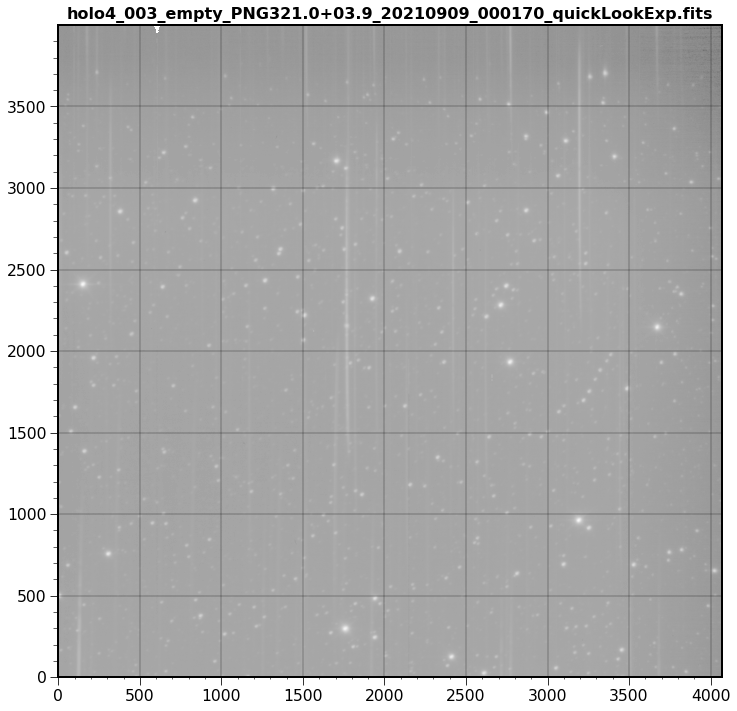

In [23]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)

ax.imshow(image,origin="lower",norm=LogNorm(),cmap="gray")

ax.minorticks_on()
ax.grid(color="k")
ax.set_title(fits_image_filename)
ax.grid(color="k")

# Spectrum

In [20]:
target_name="PNG321.0+03.9"

In [21]:
target_coord=SkyCoord.from_name(target_name)
target_coord

<SkyCoord (ICRS): (ra, dec) in deg
    (224.97283918, -54.3020902)>

In [39]:
Xcenter=1760
dX=10

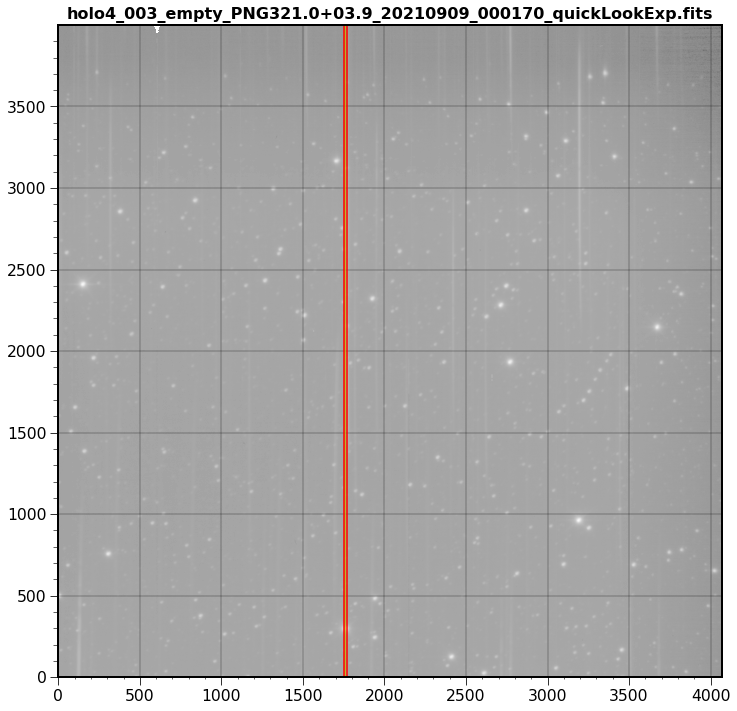

In [40]:
fig=plt.figure(figsize=(12,12))
ax=fig.add_subplot(1,1,1)

ax.imshow(image,origin="lower",norm=LogNorm(),cmap="gray")

ax.minorticks_on()
ax.grid(color="k")
ax.set_title(fits_image_filename)
ax.axvline(x=Xcenter,color="y")
ax.axvline(x=Xcenter-dX,color="r")
ax.axvline(x=Xcenter+dX,color="r")
ax.grid(color="k")

In [51]:
spectrum=np.copy(image[:,Xcenter-dX:Xcenter+dX]).sum(axis=1)

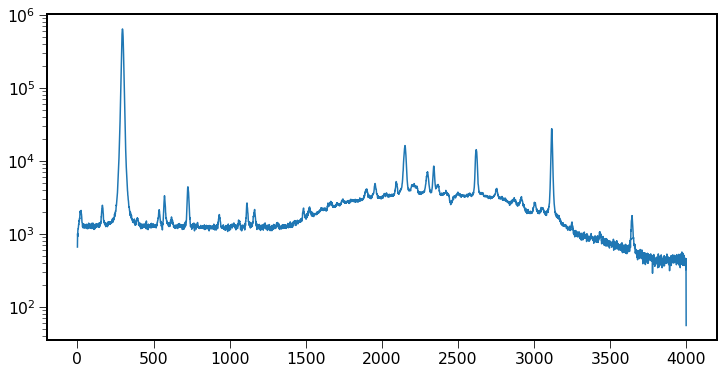

In [53]:
fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,1,1)
ax.semilogy(spectrum)
#ax.set_yscale('log')